In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import os 


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

os.chdir("/Users/gilgu/OneDrive/Escritorio")

In [ ]:
# Cargar la base de datos y re-codificar las variables categóricas

In [14]:
data = pd.read_csv("recursos_humanos.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
data = pd.get_dummies(data, columns=['sales', 'salary'], drop_first=True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


In [16]:
# Análisis exploratorio de datos para determinar si está equilibrado
print(data['left'].value_counts())


left
0    11428
1     3571
Name: count, dtype: int64


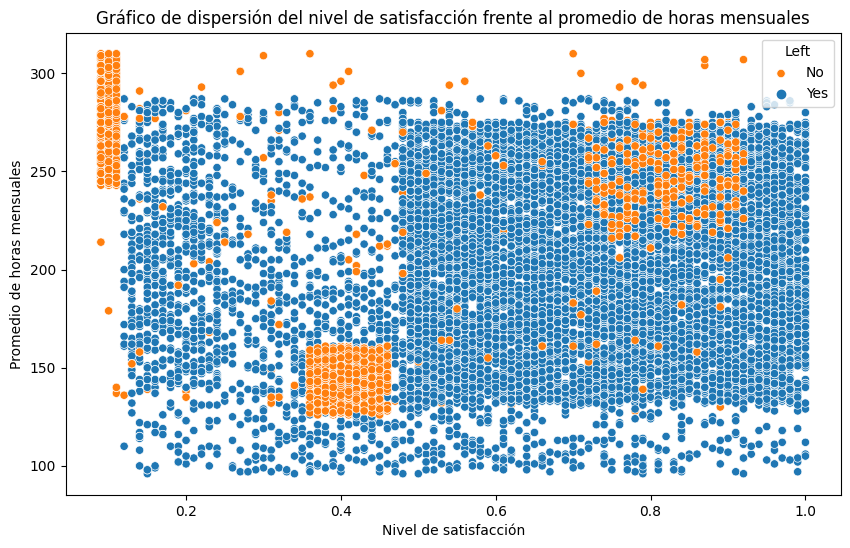

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='average_montly_hours', hue='left', data=data)
plt.title('Gráfico de dispersión del nivel de satisfacción frente al promedio de horas mensuales')
plt.xlabel('Nivel de satisfacción')
plt.ylabel('Promedio de horas mensuales')
plt.legend(title='Left', loc='upper right', labels=['No', 'Yes'])
plt.show()

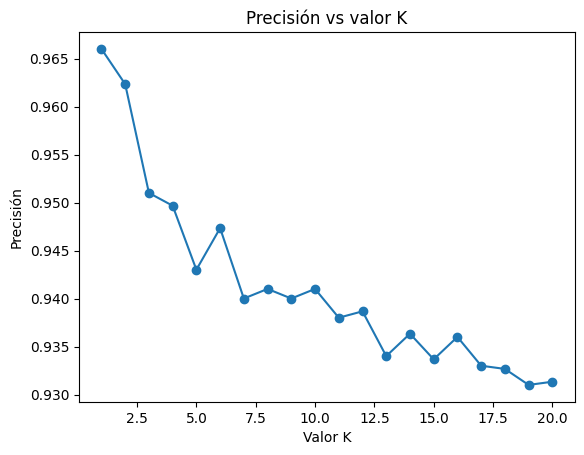

In [20]:
# Modelo KNN y búsqueda del valor óptimo de K
X = data.drop('left', axis=1)
y = data['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Valor K')
plt.ylabel('Precisión')
plt.title('Precisión vs valor K')
plt.show()

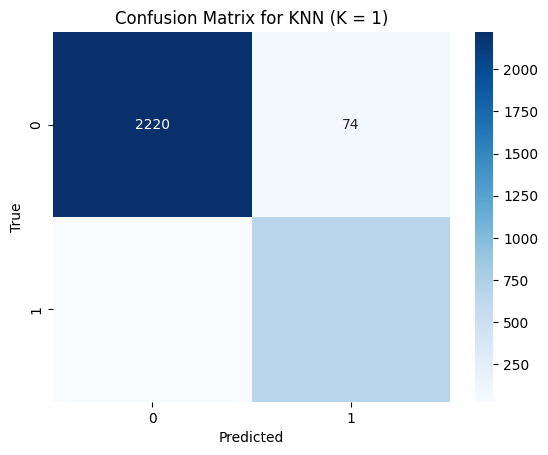

In [22]:
# Elaborar un mapa de calor para la matriz de confusión del valor óptimo de K
optimal_k = accuracies.index(max(accuracies)) + 1
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN (K = {})'.format(optimal_k))
plt.show()

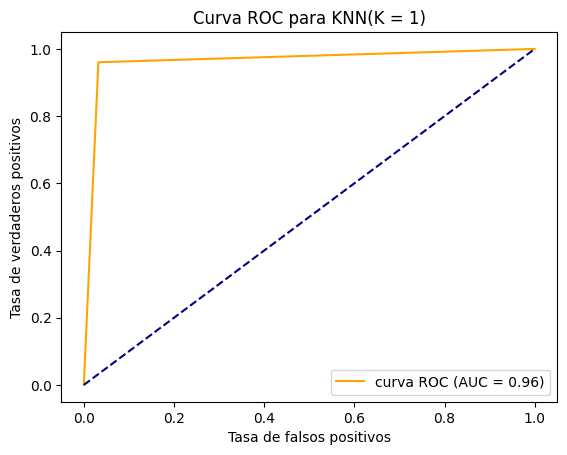

In [25]:
# Obtener e interpretar la curva ROC para el valor óptimo de K
y_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color='orange', label='curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para KNN(K = {})'.format(optimal_k))
plt.legend()
plt.show()